# Victor Hugo Videira Miranda

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans
import geopandas as gpd
from shapely.geometry import Point

In [59]:
df

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,32,Autônomo,6162,"-372,36",0,0,"1736,56",1,IPIRANGA
1,310,M,34,Privada,"3898,3","-45,74",0,0,"3567,22",1,ITAQUERA
2,431,F,28,Privada,5517,"-527,95",0,0,"2722,83",1,PENHA
3,590,F,28,Pública,"5546,2","907,92",0,0,"114,49",0,VILA PRUDENTE
4,971,F,32,Pública,5276,"1143,71",0,0,647,0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,M,31,Privada,5841,"878,31",0,0,"1588,36",0,ARICANDUVA-FORMOSA-CARRAO
496,99693,F,33,Privada,5523,"907,84",0,0,"1888,18",0,ARICANDUVA-FORMOSA-CARRAO
497,99951,F,33,Privada,5862,"1269,47",0,0,92,0,ITAIM PAULISTA
498,99956,F,35,Privada,"6218,4","883,14",0,0,"1856,47",0,BUTANTA


In [61]:
df = pd.read_csv('a.txt', sep=',')

dfr = df.drop(columns=['Sexo','Idade','Distrito','Empresa'])
dfr = dfr.replace({',': '.'}, regex=True)
dfr = dfr.astype(float)
dfr

,Cliente,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,106.0,6162.0,-372.36,0.0,0.0,1736.56,1.0
1,310.0,3898.3,-45.74,0.0,0.0,3567.22,1.0
2,431.0,5517.0,-527.95,0.0,0.0,2722.83,1.0
3,590.0,5546.2,907.92,0.0,0.0,114.49,0.0
4,971.0,5276.0,1143.71,0.0,0.0,647.00,0.0
...,...,...,...,...,...,...,...
495,98661.0,5841.0,878.31,0.0,0.0,1588.36,0.0
496,99693.0,5523.0,907.84,0.0,0.0,1888.18,0.0
497,99951.0,5862.0,1269.47,0.0,0.0,92.00,0.0
498,99956.0,6218.4,883.14,0.0,0.0,1856.47,0.0


In [3]:
le = LabelEncoder()
df_fit = df
# 0 - F
# 1 - M

# 0 - Autonomo
# 1 - Privada
# 2 - P´´ublica
df_fit['Sexo_numerica'] = le.fit_transform(df_fit['Sexo'])
df_fit['Empresa_numerica'] = le.fit_transform(df_fit['Empresa'])
df_fit['Distrito_numerica'] = le.fit_transform(df_fit['Distrito'])
df_fit = df_fit.drop(columns=['Sexo', 'Empresa','Distrito'])
df_fit 

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Sexo_numerica,Empresa_numerica,Distrito_numerica
0,106,32,6162,"-372,36",0,0,"1736,56",1,0,0,10
1,310,34,"3898,3","-45,74",0,0,"3567,22",1,1,1,12
2,431,28,5517,"-527,95",0,0,"2722,83",1,0,1,19
3,590,28,"5546,2","907,92",0,0,"114,49",0,0,2,31
4,971,32,5276,"1143,71",0,0,647,0,0,2,19
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,31,5841,"878,31",0,0,"1588,36",0,1,1,0
496,99693,33,5523,"907,84",0,0,"1888,18",0,0,1,0
497,99951,33,5862,"1269,47",0,0,92,0,0,1,11
498,99956,35,"6218,4","883,14",0,0,"1856,47",0,0,1,1


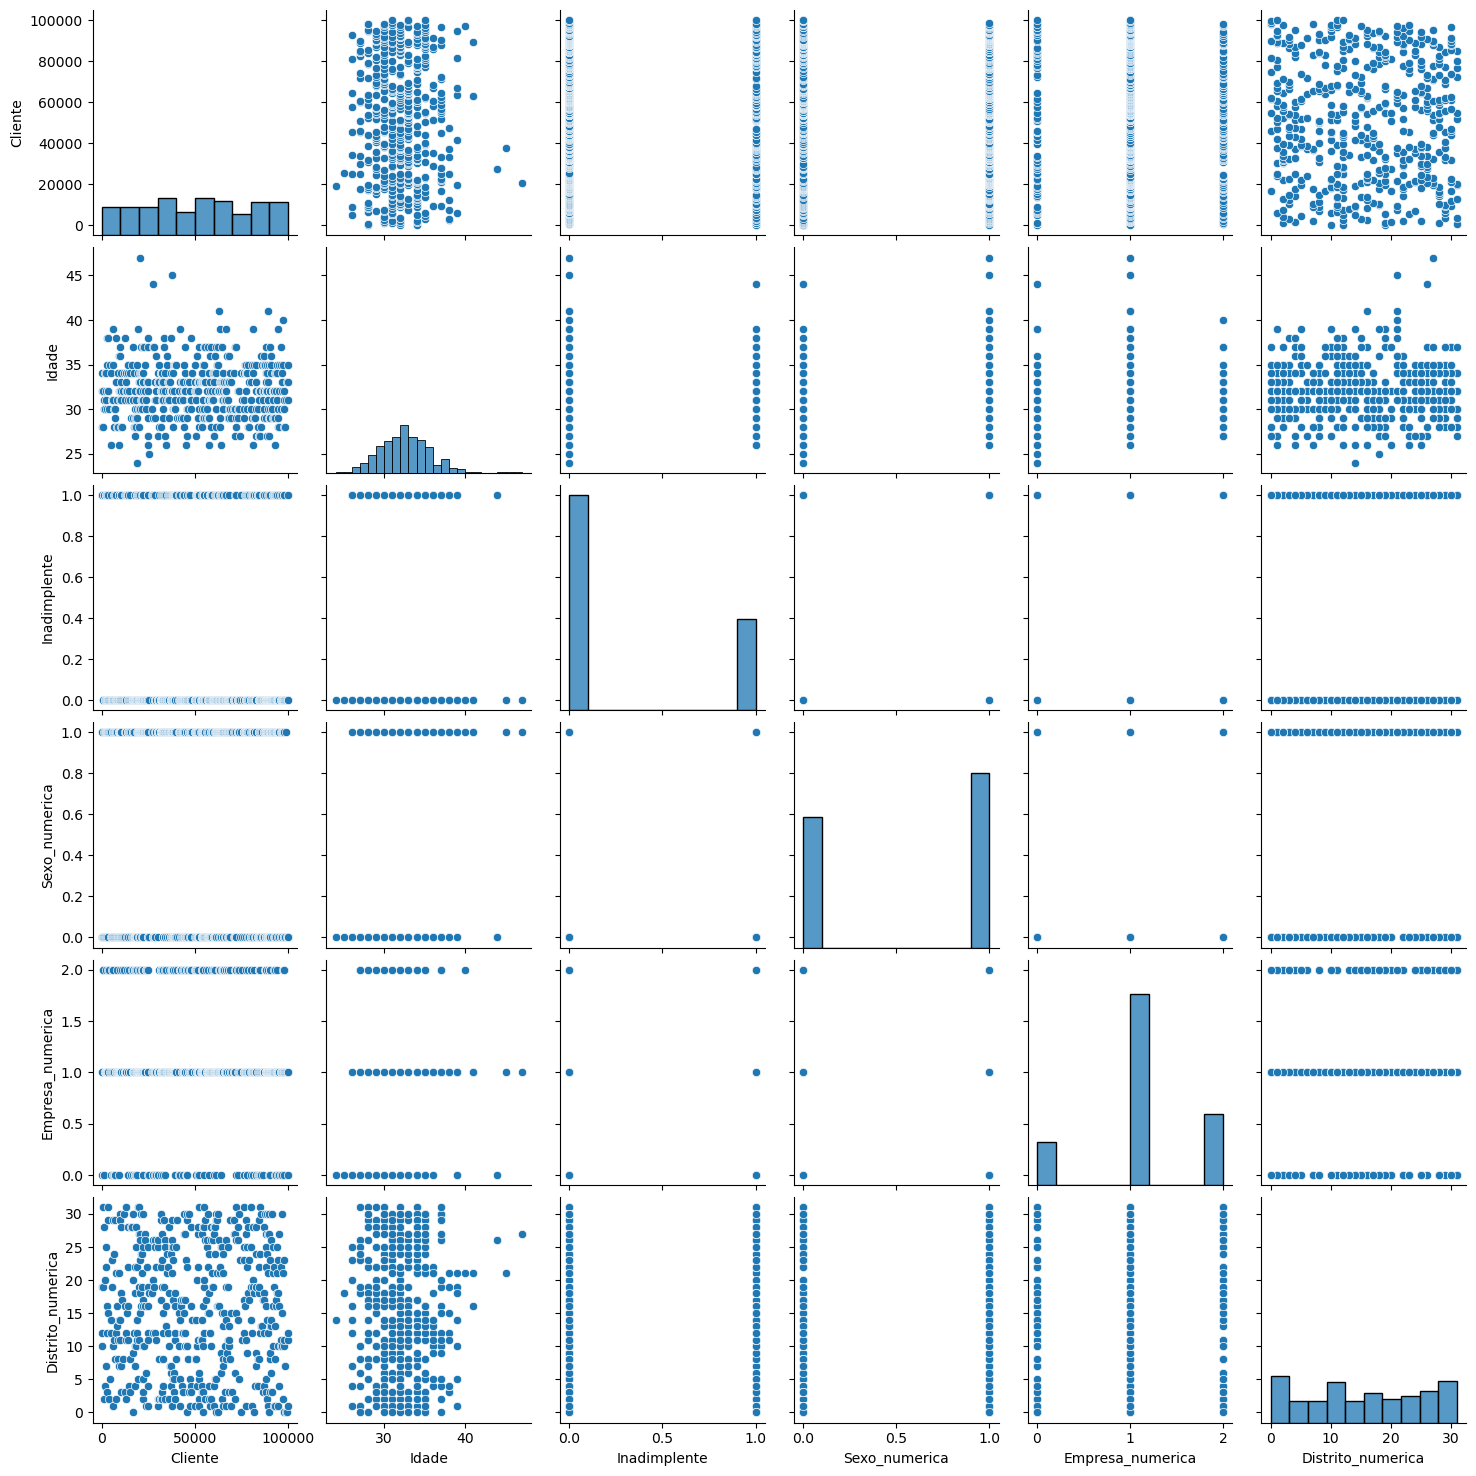

In [4]:
sns.pairplot(df_fit)

## Não é possível identificar nenhum agrupamento imediato dos dados apresentados via pairplot. Consegimos, no entando, identificar dados importantes nos histogramas, como a distribuição de indadimplentes, tipos de empresa e distribuição de sexo.

## Vamos tentar ver se há alguma relação utilizando um heatmap.

<Axes: >

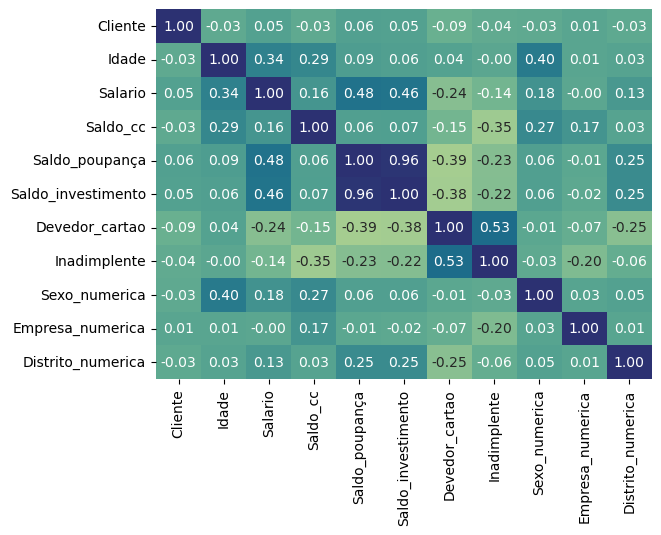

In [5]:
df_fit = df_fit.replace({',': '.'}, regex=True)
df_fit = df_fit.astype(float)

corr = np.corrcoef(df_fit.values, rowvar=False)
sns.heatmap(corr,annot=True, cmap='crest', fmt='.2f', cbar=False,xticklabels=df_fit.columns,yticklabels=df_fit.columns)

## Claramente vemos algumas correlações entre as variaveis, especificamente

    - 0.96, Saldo_investimento e saldo_poupança;
    - 0.52, Inadimplente e Devedor_cartao;
    - 0.48, Saldo_poupança e salario;
    - 0.46, Saldo_investimento e salario.
    
## Tudo bem, agora para a análise de agrupamentos em si. Precisamos escalar os dados pois a ordem de grandeza dos valores esta bem dispersa.

In [6]:
df_fit

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Sexo_numerica,Empresa_numerica,Distrito_numerica
0,106.0,32.0,6162.0,-372.36,0.0,0.0,1736.56,1.0,0.0,0.0,10.0
1,310.0,34.0,3898.3,-45.74,0.0,0.0,3567.22,1.0,1.0,1.0,12.0
2,431.0,28.0,5517.0,-527.95,0.0,0.0,2722.83,1.0,0.0,1.0,19.0
3,590.0,28.0,5546.2,907.92,0.0,0.0,114.49,0.0,0.0,2.0,31.0
4,971.0,32.0,5276.0,1143.71,0.0,0.0,647.00,0.0,0.0,2.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
495,98661.0,31.0,5841.0,878.31,0.0,0.0,1588.36,0.0,1.0,1.0,0.0
496,99693.0,33.0,5523.0,907.84,0.0,0.0,1888.18,0.0,0.0,1.0,0.0
497,99951.0,33.0,5862.0,1269.47,0.0,0.0,92.00,0.0,0.0,1.0,11.0
498,99956.0,35.0,6218.4,883.14,0.0,0.0,1856.47,0.0,0.0,1.0,1.0


In [7]:
temp = df_fit[['Cliente', 'Idade','Inadimplente','Sexo_numerica','Empresa_numerica','Distrito_numerica']]

df_fit = df_fit.drop(columns=['Cliente', 'Idade','Inadimplente','Sexo_numerica','Empresa_numerica','Distrito_numerica'])
df_norm = df_fit.copy()
df_norm.iloc[:,:] = StandardScaler().fit_transform(df_fit)
df_norm
df_norm[['Cliente', 'Idade','Inadimplente','Sexo_numerica','Empresa_numerica','Distrito_numerica']] = temp[['Cliente', 'Idade','Inadimplente','Sexo_numerica','Empresa_numerica','Distrito_numerica']]
df_norm['Distrito'] = df['Distrito']
df_norm

,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Cliente,Idade,Inadimplente,Sexo_numerica,Empresa_numerica,Distrito_numerica,Distrito
0,0.268025,-2.215993,-0.354441,-0.342015,0.046855,106.0,32.0,1.0,0.0,0.0,10.0,IPIRANGA
1,-0.992519,-1.516346,-0.354441,-0.342015,1.303521,310.0,34.0,1.0,1.0,1.0,12.0,ITAQUERA
2,-0.091144,-2.549280,-0.354441,-0.342015,0.723885,431.0,28.0,1.0,0.0,1.0,19.0,PENHA
3,-0.074884,0.526473,-0.354441,-0.342015,-1.066623,590.0,28.0,0.0,0.0,2.0,31.0,VILA PRUDENTE
4,-0.225345,1.031554,-0.354441,-0.342015,-0.701079,971.0,32.0,0.0,0.0,2.0,19.0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.089276,0.463046,-0.354441,-0.342015,-0.054878,98661.0,31.0,0.0,1.0,1.0,0.0,ARICANDUVA-FORMOSA-CARRAO
496,-0.087803,0.526301,-0.354441,-0.342015,0.150935,99693.0,33.0,0.0,0.0,1.0,0.0,ARICANDUVA-FORMOSA-CARRAO
497,0.100970,1.300943,-0.354441,-0.342015,-1.082062,99951.0,33.0,0.0,0.0,1.0,11.0,ITAIM PAULISTA
498,0.299432,0.473392,-0.354441,-0.342015,0.129168,99956.0,35.0,0.0,0.0,1.0,1.0,BUTANTA


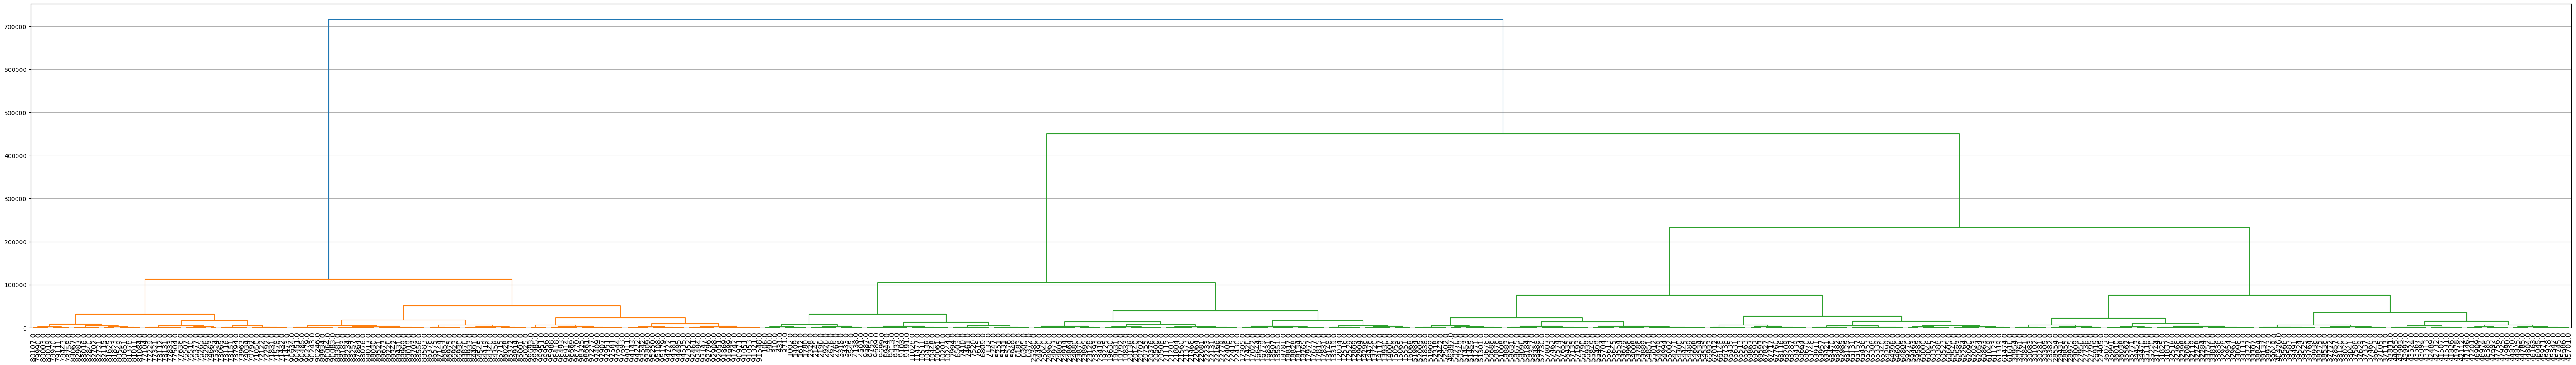

In [8]:
L = hierarchy.linkage(df_norm.drop(columns='Distrito'),'ward')
plt.figure(figsize=(78,10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(L,labels=list(df_norm['Cliente']),leaf_font_size=12)


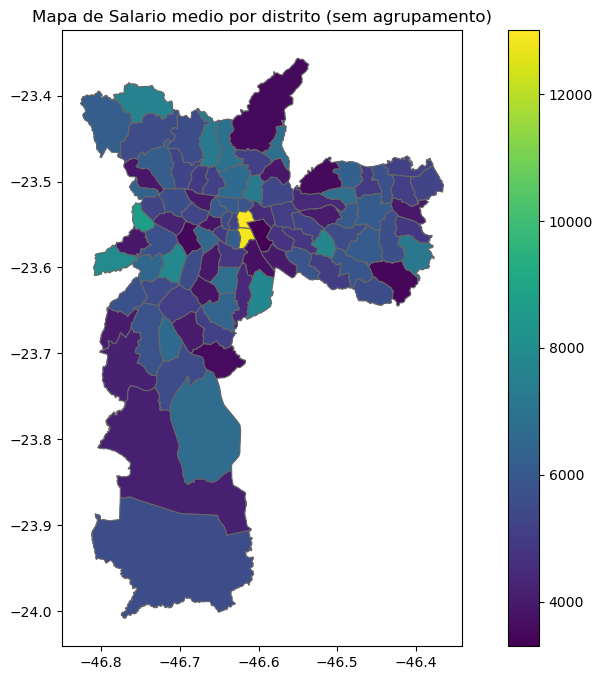

In [50]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import geopandas as gpd

url_dados = "https://github.com/cibelerusso/Datasets/raw/main/amostra_banco_distrito.csv"
dados = pd.read_csv(url_dados)
dados.rename(columns={"Distrito": "ds_nome"}, inplace=True)

url_geojson = "https://github.com/cibelerusso/Datasets/raw/main/distritos-sp.geojson"
distritos_geo = gpd.read_file(url_geojson)

variavel_escolhida = 'Salario'
X = dados.drop(['ds_nome'], axis=1)  
modelo_aglomerativo = AgglomerativeClustering(n_clusters=3)
X = X.drop(columns=['Sexo', 'Empresa'])
X = X.replace({',': '.'}, regex=True)
X = X.astype(float)
X['ds_nome'] = distritos_geo['ds_nome']

media_por_distrito = np.round(X.groupby('ds_nome')[variavel_escolhida].mean(),2)

estatisticas_por_distrito = media_por_distrito

dados_geo = distritos_geo.merge(estatisticas_por_distrito, left_on='ds_nome', right_index=True)

fig, ax = plt.subplots(figsize=(12, 8))
dados_geo.plot(column=variavel_escolhida, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.4', legend=True)
plt.title(f'Mapa de {variavel_escolhida} medio por distrito (sem agrupamento)')
plt.show()
